In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [26]:
gaming_csv = "GamingStudy_data.csv"

In [27]:
hours_spent_df = pd.read_csv(gaming_csv,encoding="ISO-8859-1")
hours_spent_df

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,14246,42057.75678,1,0,0,1,0,1,1,Not difficult at all,...,France,France,Reddit,Multiplayer - online - with strangers,Accept,4,28,7.0,FRA,FRA
13460,14247,42057.81185,3,3,3,3,2,3,3,Extremely difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,20,23,25.0,USA,USA
13461,14248,42058.16964,0,0,0,0,0,0,0,Not difficult at all,...,Norway,Norway,Reddit,Multiplayer - online - with real life friends,Accept,0,32,10.0,NOR,NOR
13462,14249,42058.24420,3,2,1,3,0,1,3,Somewhat difficult,...,Canada,Canada,Reddit,Singleplayer,Accept,13,16,32.0,CAN,CAN


In [28]:
loc_df = hours_spent_df.loc[hours_spent_df['Residence'] == "USA", :]
loc_df

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
5,6,42052.13119,0,0,0,0,0,1,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with real life friends,Accept,1,17,13.0,USA,USA
6,7,42052.14622,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,16,26.0,USA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13451,14237,42056.67219,0,0,1,0,0,1,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with real life friends,Accept,2,27,33.0,USA,USA
13452,14238,42056.81326,1,0,1,0,0,0,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with real life friends,Accept,2,17,23.0,USA,USA
13454,14240,42056.97403,1,1,1,1,1,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with real life friends,Accept,6,12,NaN,USA,USA
13458,14245,42057.35267,0,1,1,1,0,2,1,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,6,16,12.0,USA,USA


In [30]:
loc2_df=hours_spent_df.copy().loc[hours_spent_df['Residence'].isin(["Germany","UK", "Canada","Netherlands","France"])]
loc2_df

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
14,15,42052.39588,0,0,0,1,0,1,0,Not difficult at all,...,Canada,Canada,Reddit,Multiplayer - online - with strangers,Accept,2,13,33.0,CAN,CAN
16,17,42052.46977,1,0,1,1,0,1,0,Not difficult at all,...,UK,UK,Reddit,Multiplayer - offline (people in the same room),Accept,4,15,36.0,GBR,GBR
21,22,42052.65303,3,3,3,2,0,1,3,Extremely difficult,...,Germany,Germany,Other,Multiplayer - online - with online acquaintanc...,Accept,15,9,37.0,DEU,DEU
22,23,42052.66261,0,0,0,1,1,1,0,Not difficult at all,...,Canada,Canada,Reddit,Singleplayer,Accept,3,31,5.0,CAN,CAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13453,14239,42056.82696,2,0,0,1,1,0,0,Somewhat difficult,...,Germany,Germany,Reddit,Multiplayer - online - with strangers,Accept,4,30,34.0,DEU,DEU
13457,14243,42057.13327,1,2,2,2,0,0,0,Somewhat difficult,...,Netherlands,Netherlands,Reddit,Multiplayer - online - with strangers,Accept,7,5,33.0,NLD,NLD
13459,14246,42057.75678,1,0,0,1,0,1,1,Not difficult at all,...,France,France,Reddit,Multiplayer - online - with strangers,Accept,4,28,7.0,FRA,FRA
13462,14249,42058.24420,3,2,1,3,0,1,3,Somewhat difficult,...,Canada,Canada,Reddit,Singleplayer,Accept,13,16,32.0,CAN,CAN


In [31]:
hours_spent_df = loc_df["Hours"]
hours_spent_df

0        15.0
1         8.0
3        20.0
5         4.0
6        30.0
         ... 
13451    20.0
13452    10.0
13454    40.0
13458    30.0
13460    20.0
Name: Hours, Length: 4569, dtype: float64

In [32]:
hours_spent2_df = loc2_df["Hours"]
hours_spent2_df

2         0.0
14       30.0
16        4.0
21       60.0
22       10.0
         ... 
13453    10.0
13457    15.0
13459    40.0
13462     5.0
13463    15.0
Name: Hours, Length: 4336, dtype: float64

In [35]:
hours_spent_df .nunique()

69

In [36]:
hours_spent2_df .nunique()

66

In [66]:
hourz=loc_df.loc[loc_df['Hours']>=5]['Hours'].value_counts().head(33)
hourz
# i have exluded reposnes that having digit resposnes

20.0    837
10.0    547
15.0    440
30.0    374
25.0    254
40.0    208
12.0    186
14.0    153
5.0     150
8.0     146
35.0    130
21.0    100
18.0     98
16.0     98
6.0      90
7.0      85
50.0     68
24.0     59
28.0     56
60.0     40
9.0      35
17.0     33
45.0     33
13.0     27
42.0     16
32.0     16
70.0     15
11.0     15
80.0     14
36.0     13
23.0     11
56.0     10
22.0     10
Name: Hours, dtype: int64

In [67]:
# hours_spent2_df .value_counts()
hourz2=loc2_df.loc[loc2_df['Hours']>=5]['Hours'].value_counts().head(31)
hourz2
# i have exluded reposnes that having digit resposnes

20.0    722
10.0    429
30.0    409
15.0    344
25.0    316
40.0    188
14.0    186
21.0    157
35.0    156
12.0    156
8.0     124
18.0    116
5.0     112
50.0     97
16.0     97
28.0     82
7.0      66
6.0      49
24.0     45
60.0     43
70.0     33
17.0     30
22.0     24
45.0     24
42.0     23
9.0      23
13.0     22
23.0     11
27.0     10
11.0     10
49.0     10
Name: Hours, dtype: int64

<AxesSubplot:title={'center':'Number of Hours Spent Playing'}, xlabel='Hours Played', ylabel='Number of Responses '>

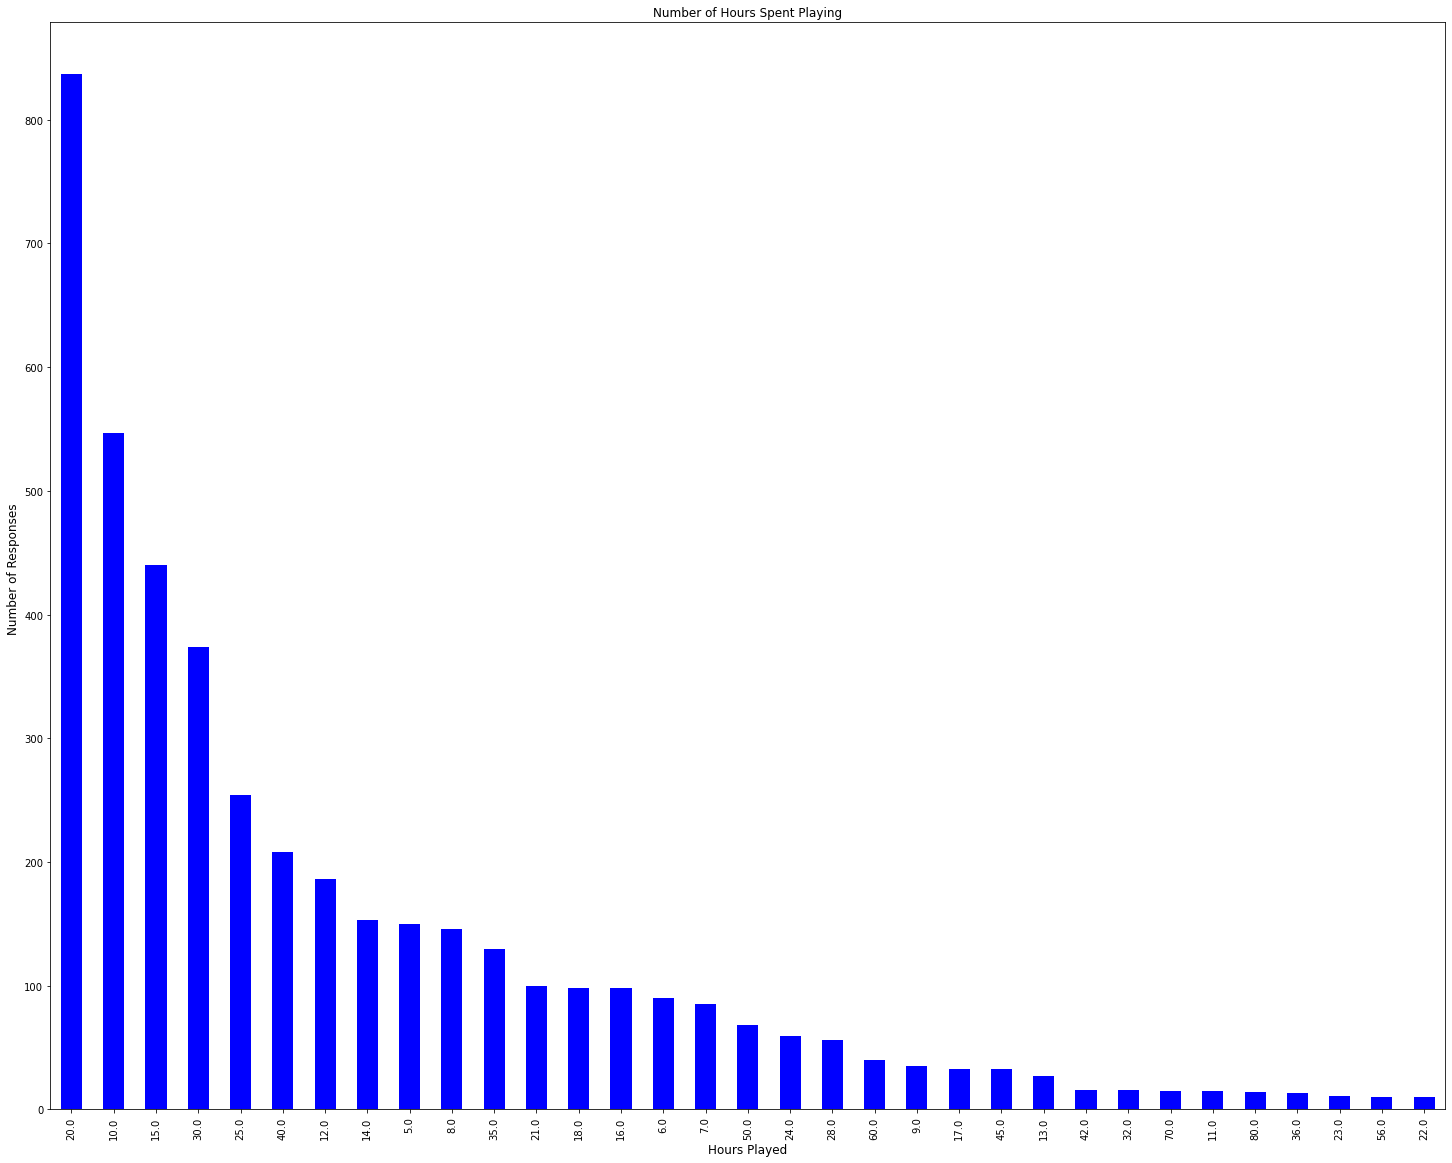

In [76]:
Bar_pandas = hourz.plot.bar(color = 'b',figsize=(25,20) )
Bar_pandas.set_title("Number of Hours Spent Playing",fontsize = 12)
Bar_pandas.set_xlabel("Hours Played",fontsize = 12)
Bar_pandas.set_ylabel("Number of Responses ",fontsize = 12)
Bar_pandas

<AxesSubplot:title={'center':'Number of Hours Spent Playing'}, xlabel='Hours Played', ylabel='Number of Responses '>

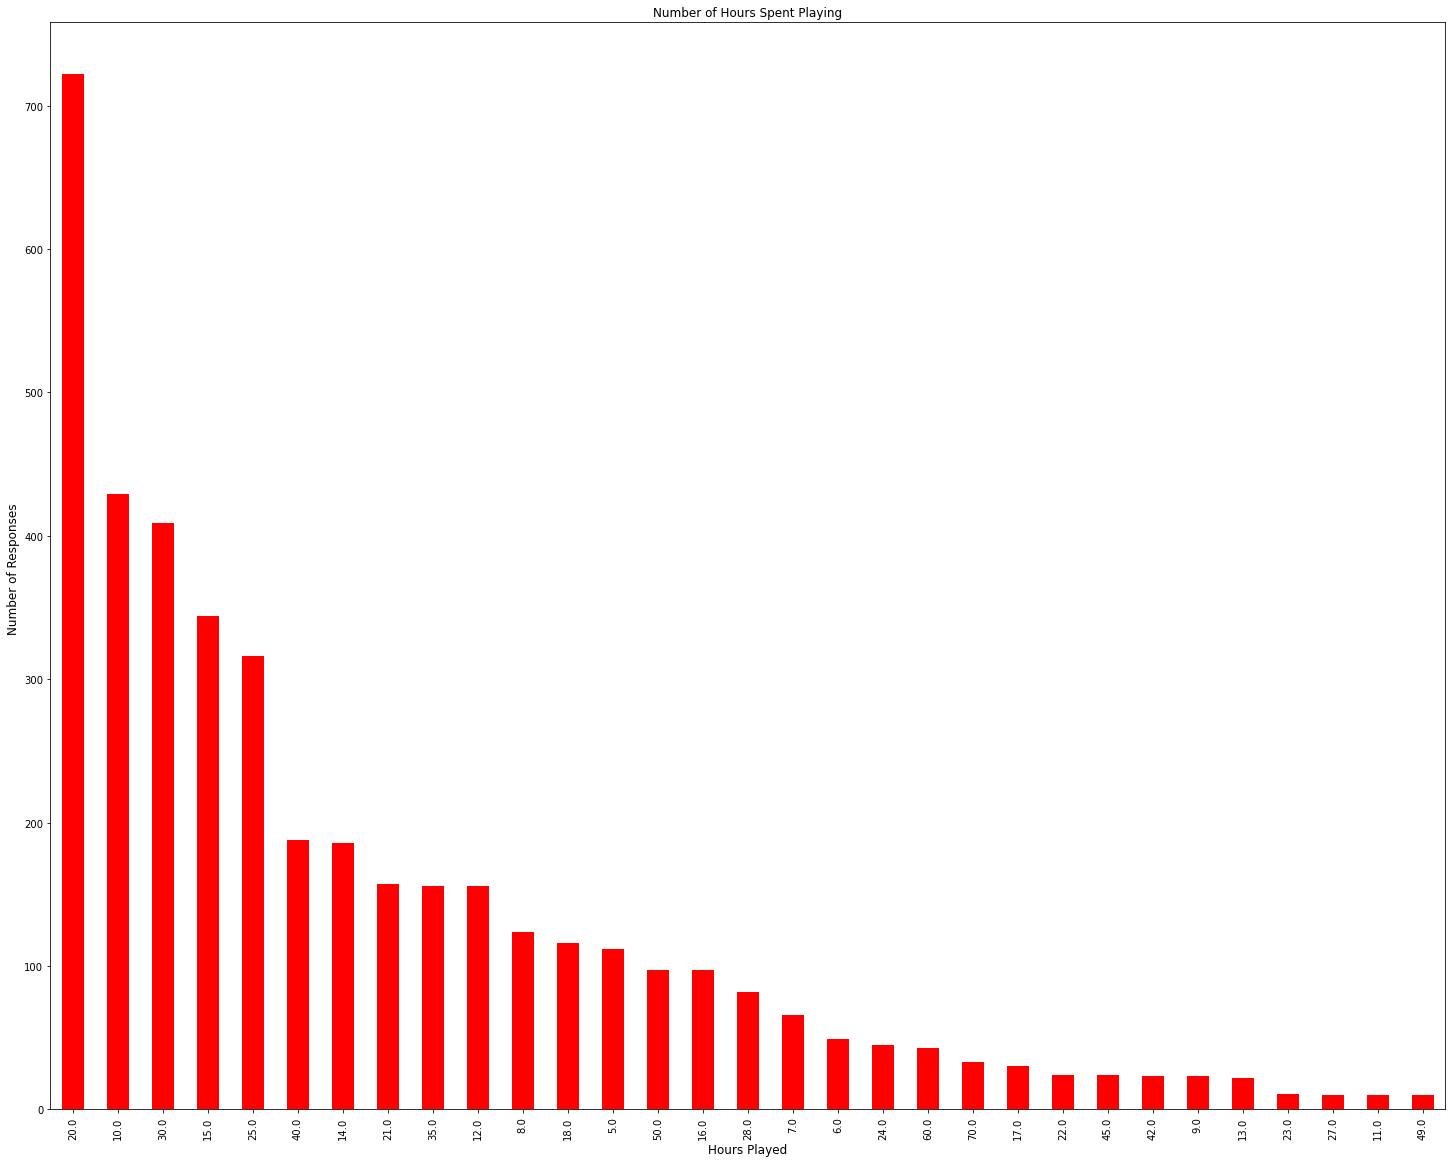

In [74]:
Bar_pandas = hourz2.plot.bar(color = 'r',figsize=(25,20) )
Bar_pandas.set_title("Number of Hours Spent Playing",fontsize = 12)
Bar_pandas.set_xlabel("Hours Played",fontsize = 12)
Bar_pandas.set_ylabel("Number of Responses ",fontsize = 12)
Bar_pandas

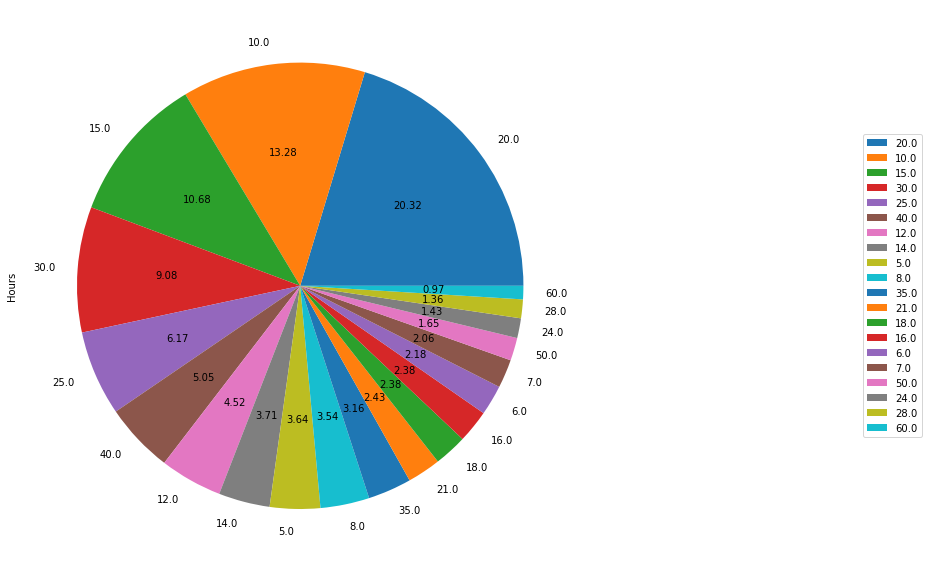

In [86]:
hourz.head(20).plot(kind = "pie",figsize= (10,15),autopct='%.2f',)
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
#top 20 most used answers, (to make it pretty)

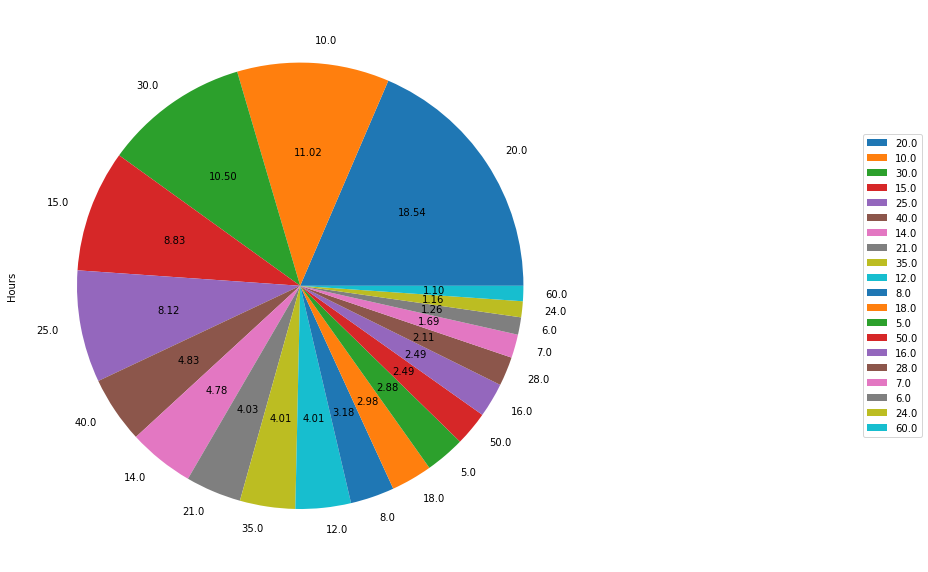

In [87]:
hourz2.head(20).plot(kind = "pie",figsize= (10,15),autopct='%.2f',)
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
#top 20 most used answers, (to make it pretty)